# Movie Recommendation System - Content Based

## Data set
These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

- `movies_metadata.csv`: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

- `keywords.csv`: Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

- `credits.csv`: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

- `links.csv`: The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.


The Full MovieLens Dataset consisting of 26 million ratings and 750,000 tag applications from 270,000 users on all the 45,000 movies in this dataset can be accessed [here](https://grouplens.org/datasets/movielens/latest/)

## Overview


There are basically three types of recommender systems:-

- **Demographic Filtering** They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.
- **Content Based Filtering** They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.
- **Collaborative Filtering**: This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.



In [2]:
import numpy as np
import pandas as pd

In [3]:
credits = pd.read_csv("./data/The_Movies/credits.csv")
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862



- `id` - A unique identifier for each movie.
- `cast` - The name of lead and supporting actors.
- `crew` - The name of Director, Editor, Composer, Writer etc.


In [4]:
keywords = pd.read_csv("./data/The_Movies/keywords.csv")
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


- `id` - A unique identifier for each movie.
- `keywords` - The keywords or tags related to the movie.

In [5]:
movies_metadata = pd.read_csv("./data/The_Movies/movies_metadata.csv")
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415,NaN,NaN,NaN,NaN
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413,NaN,NaN,NaN,NaN
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92,NaN,NaN,NaN,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34,NaN,NaN,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173,NaN,NaN,NaN,NaN



- `budget` - The budget in which the movie was made.
- `genre` - The genre of the movie, Action, Comedy ,Thriller etc.
- `homepage` - A link to the homepage of the movie.
- `id` - This is infact the movie_id as in the first dataset.
- `keywords` - The keywords or tags related to the movie.
- `original`_language - The language in which the movie was made.
- `original_title` - The title of the movie before translation or adaptation.
- `overview` - A brief description of the movie.
- `popularity` - A numeric quantity specifying the movie popularity.
- `production_companies` - The production house of the movie.
- `production_countries` - The country in which it was produced.
- `release_date` - The date on which it was released.
- `revenue` - The worldwide revenue generated by the movie.
- `runtime` - The running time of the movie in minutes.
- `status` - "Released" or "Rumored".
- `tagline` - Movie's tagline.
- `title` - Title of the movie.
- `vote_average` - average ratings the movie recieved.
- `vote_count` - the count of votes recieved.


## Demographic Filtering

Before getting started with this -

- we need a metric to score or rate movie
- Calculate the score for every movie
- Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr)which is given as :
![](./images/wr.png)

where,

- `v` is the number of votes for the movie;
- `m` is the minimum votes required to be listed in the chart;
- `R` is the average rating of the movie; And
- `C` is the mean vote across the whole report

We already have v(vote_count) and R (vote_average) and C can be calculated as

In [6]:
movies_metadata.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                385
production_companies         4
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  24986
title                       64
video                       10
vote_average                 9
vote_count                   9
Unnamed: 24              45335
Unnamed: 25              45443
Unnamed: 26              45455
Unnamed: 27              45461
dtype: int64

In [7]:
# Drop NAN value
movies_metadata.dropna(subset=['vote_average'], inplace=True)

In [8]:
# Drop string value in vote_average
movies_metadata.drop(movies_metadata[movies_metadata['vote_average'].str.len()>3].index, inplace=True)

In [9]:
movies_metadata['vote_average'] = movies_metadata['vote_average'].astype(float)
C = movies_metadata['vote_average'].astype(float).mean()
C

5.617800966268834

We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [10]:
movies_metadata['vote_count'] = movies_metadata['vote_count'].astype(float)
m = movies_metadata['vote_count'].astype(float).quantile(0.9)
m

160.0

In [11]:
q_movies = movies_metadata.copy().loc[movies_metadata['vote_count'].astype(float) >= m]
q_movies.shape

(4541, 28)

We see that there are 4541 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, weighted_rating() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [12]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [13]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [14]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445861
834,The Godfather,6024.0,8.5,8.425428
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421374
12481,The Dark Knight,12269.0,8.3,8.265472
2843,Fight Club,9678.0,8.3,8.256378
292,Pulp Fiction,8670.0,8.3,8.251398
522,Schindler's List,4436.0,8.3,8.206625
23673,Whiplash,4376.0,8.3,8.205390
5481,Spirited Away,3968.0,8.3,8.196039
2211,Life Is Beautiful,3643.0,8.3,8.187154


Hurray! We have made our first(though very basic) recommender. Under the Trending Now tab of these systems we find movies that are very popular and they can just be obtained by sorting the dataset by the popularity column.

In [15]:
q_movies['popularity'] = movies_metadata['popularity'].astype(float)

Text(0.5, 1.0, 'Popular Movies')

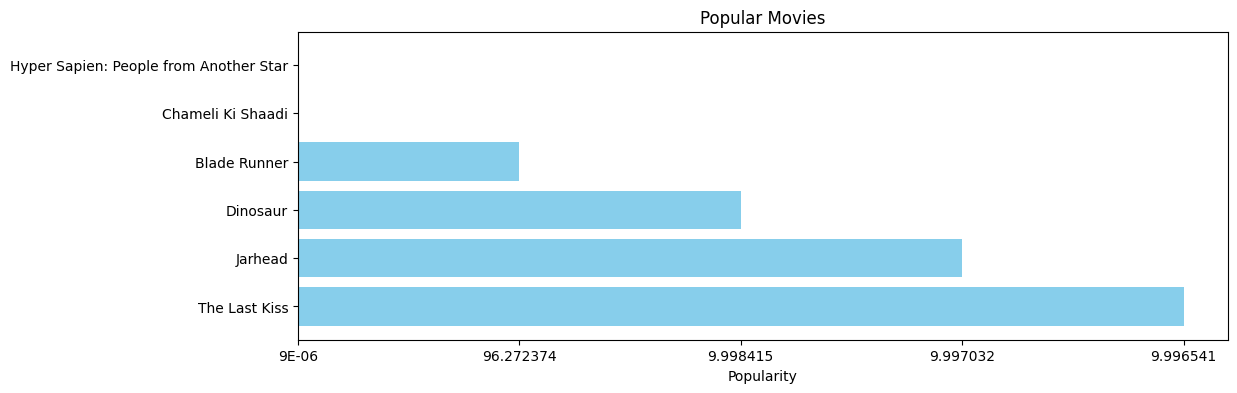

In [16]:
import matplotlib.pyplot as plt
pop = movies_metadata.sort_values('popularity', ascending=False)

plt.figure(figsize=(12, 4))
plt.barh(pop['title'].head(6), pop['popularity'].head(6), align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")
# pop['popularity'].head()

## Content Based Filtering

In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.
![](images/conten.png)

In [17]:
movies_metadata['id'] = movies_metadata['id'].astype(np.int64)

Merge 3 file into one file

In [18]:
df_movies = pd.merge(movies_metadata, credits, how='inner', on='id')
df_movies = df_movies.merge(keywords, how='inner', on='id')
df_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,video,vote_average,vote_count,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,False,7.7,5415.0,NaN,NaN,NaN,NaN,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,False,6.9,2413.0,NaN,NaN,NaN,NaN,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,False,6.5,92.0,NaN,NaN,NaN,NaN,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,False,6.1,34.0,NaN,NaN,NaN,NaN,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,False,5.7,173.0,NaN,NaN,NaN,NaN,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [19]:
df_movies.shape

(46486, 31)

In [20]:
# genres
# id
# keywords
# title
# overview
# cast
# crew
movies = df_movies[['id', 'genres', 'title', 'keywords', 'overview', 'cast', 'crew']]
movies.head()

,id,genres,title,keywords,overview,cast,crew
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","Led by Woody, Andy's toys live happily in his ...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,"[{'id': 10090, 'name': 'board game'}, {'id': 1...",When siblings Judy and Peter discover an encha...,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",A family wedding reignites the ancient feud be...,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,"[{'id': 818, 'name': 'based on novel'}, {'id':...","Cheated on, mistreated and stepped on, the wom...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,11862,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",Just when George Banks has recovered from his ...,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [21]:
movies.isnull().sum()

id            0
genres        0
title         0
keywords      0
overview    995
cast          0
crew          0
dtype: int64

In [22]:
# Overview very importance factor for recommend to audian. Drop movies without overview.
movies.dropna(inplace=True)
movies.isnull().sum()

/tmp/ipykernel_25031/1143144810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(inplace=True)


id          0
genres      0
title       0
keywords    0
overview    0
cast        0
crew        0
dtype: int64

In [23]:
movies.duplicated().sum()

1141

In [24]:
movies.drop_duplicates(inplace=True)
movies.duplicated().sum()

/tmp/ipykernel_25031/616039193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.drop_duplicates(inplace=True)


0

### Extract information from `genres`

In [25]:
movies.iloc[0].genres

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [26]:
import ast

# Using ast.literal_eval: genres can be a string
# Without ast.literal_eval: genres must be a list of dict

def extract_info(obj):
    list_info = []
    for info in ast.literal_eval(obj):
        list_info.append(info['name'])
    
    return list_info

In [27]:
movies['genres'] = movies['genres'].apply(extract_info)

/tmp/ipykernel_25031/3940967139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres'] = movies['genres'].apply(extract_info)


### Extract information from `keywords`


In [28]:
movies.iloc[0].keywords

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [29]:
movies['keywords'] = movies['keywords'].apply(extract_info)

/tmp/ipykernel_25031/1930941190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['keywords'] = movies['keywords'].apply(extract_info)


### Extract three of first information from `cast`

In [30]:
def extract_info3(obj):
    list_info = []
    cnt = 0
    for info in ast.literal_eval(obj):
        if cnt != 3:
            list_info.append(info['name'])
            cnt += 1
        else:
            break
        
    return list_info

In [31]:
movies['cast'] = movies['cast'].apply(extract_info3)

/tmp/ipykernel_25031/1580563371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['cast'] = movies['cast'].apply(extract_info3)


### Extract name of director from `crew`

In [32]:
def extract_director(obj):
    director = []
    for info in ast.literal_eval(obj):
        if info['job'] == 'Director':
            director.append(info['name'])
        
    return director

In [33]:
movies['crew'] = movies['crew'].apply(extract_director)
movies.head()

/tmp/ipykernel_25031/1530818264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['crew'] = movies['crew'].apply(extract_director)


,id,genres,title,keywords,overview,cast,crew
0,862,"[Animation, Comedy, Family]",Toy Story,"[jealousy, toy, boy, friendship, friends, riva...","Led by Woody, Andy's toys live happily in his ...","[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter]
1,8844,"[Adventure, Fantasy, Family]",Jumanji,"[board game, disappearance, based on children'...",When siblings Judy and Peter discover an encha...,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston]
2,15602,"[Romance, Comedy]",Grumpier Old Men,"[fishing, best friend, duringcreditsstinger, o...",A family wedding reignites the ancient feud be...,"[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch]
3,31357,"[Comedy, Drama, Romance]",Waiting to Exhale,"[based on novel, interracial relationship, sin...","Cheated on, mistreated and stepped on, the wom...","[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker]
4,11862,[Comedy],Father of the Bride Part II,"[baby, midlife crisis, confidence, aging, daug...",Just when George Banks has recovered from his ...,"[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer]


In [34]:
movies.iloc[0].overview

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [35]:
# Split overview to list
movies['overview'] = movies['overview'].apply(lambda x: x.split())

/tmp/ipykernel_25031/106285834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['overview'] = movies['overview'].apply(lambda x: x.split())


In [36]:
# Remove space between name
movies['crew'] = movies['crew'].apply(lambda x: [i.replace(' ', '') for i in x])
movies['cast'] = movies['cast'].apply(lambda x: [i.replace(' ', '') for i in x])
movies['genres'] = movies['genres'].apply(lambda x: [i.replace(' ', '') for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x: [i.replace(' ', '') for i in x])

/tmp/ipykernel_25031/4283920493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['crew'] = movies['crew'].apply(lambda x: [i.replace(' ', '') for i in x])
/tmp/ipykernel_25031/4283920493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['cast'] = movies['cast'].apply(lambda x: [i.replace(' ', '') for i in x])
/tmp/ipykernel_25031/4283920493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [37]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
movies.head()

/tmp/ipykernel_25031/2132536172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']


,id,genres,title,keywords,overview,cast,crew,tags
0,862,"[Animation, Comedy, Family]",Toy Story,"[jealousy, toy, boy, friendship, friends, riva...","[Led, by, Woody,, Andy's, toys, live, happily,...","[TomHanks, TimAllen, DonRickles]",[JohnLasseter],"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,"[Adventure, Fantasy, Family]",Jumanji,"[boardgame, disappearance, basedonchildren'sbo...","[When, siblings, Judy, and, Peter, discover, a...","[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[When, siblings, Judy, and, Peter, discover, a..."
2,15602,"[Romance, Comedy]",Grumpier Old Men,"[fishing, bestfriend, duringcreditsstinger, ol...","[A, family, wedding, reignites, the, ancient, ...","[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch],"[A, family, wedding, reignites, the, ancient, ..."
3,31357,"[Comedy, Drama, Romance]",Waiting to Exhale,"[basedonnovel, interracialrelationship, single...","[Cheated, on,, mistreated, and, stepped, on,, ...","[WhitneyHouston, AngelaBassett, LorettaDevine]",[ForestWhitaker],"[Cheated, on,, mistreated, and, stepped, on,, ..."
4,11862,[Comedy],Father of the Bride Part II,"[baby, midlifecrisis, confidence, aging, daugh...","[Just, when, George, Banks, has, recovered, fr...","[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer],"[Just, when, George, Banks, has, recovered, fr..."


In [38]:
new_movies = movies[['id', 'title', 'tags']]
new_movies['tags'] = new_movies['tags'].apply(lambda x: " ".join(x))
new_movies.head()

/tmp/ipykernel_25031/3983806332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tags'] = new_movies['tags'].apply(lambda x: " ".join(x))


,id,title,tags
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [39]:
new_movies['tags'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences. Animation Comedy Family jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife TomHanks TimAllen DonRickles JohnLasseter"

In [40]:
new_movies['tags'] = new_movies['tags'].apply(lambda x: x.lower())

/tmp/ipykernel_25031/1586435607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tags'] = new_movies['tags'].apply(lambda x: x.lower())


In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y)

In [42]:
new_movies['tags'] = new_movies['tags'].apply(stem)

/tmp/ipykernel_25031/3229886743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tags'] = new_movies['tags'].apply(stem)


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=5000, stop_words='english')
vectors = vect.fit_transform(new_movies['tags']).toarray()

In [44]:
len(vect.get_feature_names())

/home/hoaitran/Documents/dev/movie-recommender-system/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


5000

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity). There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

![](./images/cosin.png)

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(vectors).shape

: 

: 

In [ ]:
def recommend(movie):
    movie_index = new_movies[new_movies['title'] == movie].index[0]
    distance = similarity[movie_index]
    movie_list = sorted(list(enumerate(distance)), reverse=True, key=lambda x: x[1])[1:6]

    for i in movie_list:
        print(new_movies.iloc[i[0]].title)